In [330]:
!pip install numpy
!pip install pandas
!pip install matplotlib

In [461]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Линейная регрессия

In [464]:
class MyLinearRegression:
    def __init__(self):
        self.weights = [] # коэффициенты
        self.costs_per_epoch = [] #значения свободного члена

    def fit(self, X, y, lr=0.01, epochs=1000):
        # Добавить один столбец с единицами для смещения
        X = np.concatenate([np.ones((len(X), 1)), X], axis=1)
        self.weights = np.zeros(X.shape[1])

        # Обучение модели с использованием градиентного спуска
        for _ in range(epochs):
            predictions = np.dot(X, self.weights)
            errors = predictions - y
            self.weights -= lr * np.dot(X.T, errors) / len(y)
            self.costs_per_epoch.append(np.mean(errors ** 2))

    def predict(self, X):
        X = np.concatenate([np.ones((len(X), 1)), X], axis=1)
        return np.dot(X, self.weights)

    def mean_squared_error(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    def r_squared(self, y_true, y_pred):
        total = np.sum((y_true - np.mean(y_true)) ** 2)
        residual = np.sum((y_true - y_pred) ** 2)
        return 1 - (residual / total)

### Проверка на рандомных данных

In [467]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X, y = make_regression(n_samples=1000, n_features=1, noise=5)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.60)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(600, 1) (600,)
(400, 1) (400,)


Predictions: [ -22.33914988  -56.82542937   -4.45999261 -157.89690075  -15.26985416]
Mean Squared Error: 26.25
R^2 Score: 1.00


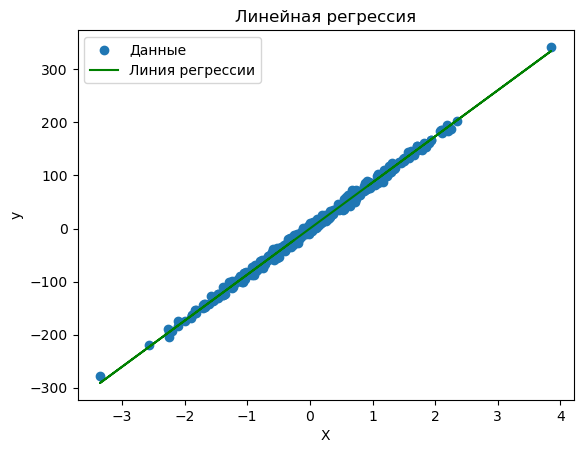

In [469]:
# Обучение
model = MyLinearRegression()
model.fit(X_train, y_train)

# Предсказание и метрики
y_pred = model.predict(X_test)
mse = model.mean_squared_error(y_test, y_pred)
r2 = model.r_squared(y_test, y_pred)

print(f'Predictions: {y_pred[:5]}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

# Уравнение прямой
X_test_reshaped = X_test.reshape(-1, 1)
lin_ur = model.predict(X_test_reshaped)

# Визуализация
plt.scatter(X_test, y_test, label='Данные')
plt.plot(X_test_reshaped, lin_ur, color='green', label='Линия регрессии')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Линейная регрессия')
plt.legend()
plt.show()

### Проверка sklearn

In [472]:
from sklearn.linear_model import LinearRegression

lin_reg_model = LinearRegression()

lin_reg_model.fit(X_train, y_train)

r_sq = lin_reg_model.score(X_test, y_test)
print(f'R^2 Score: {r_sq:.2f}')

R^2 Score: 1.00


(400, 1)


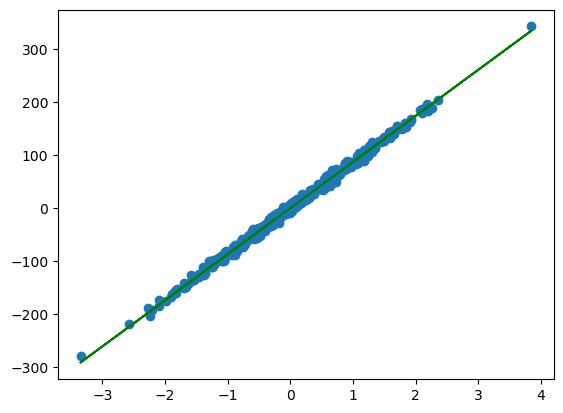

In [474]:
# Найденное значение коэфициента
b1 = lin_reg_model.coef_
# Найденное значение свободного члена
b0 = lin_reg_model.intercept_

X_test = X_test.reshape(-1,1)
print(X_test.shape)

# Уравнение прямой
lin_ur = X_test @ b1 + b0

# Визуализация
plt.scatter(X_test,y_test)
plt.plot(X_test,lin_ur, c='green')

# Логистическая регрессия

In [477]:
class MyLogisticRegression:
    def __init__(self):
        self.weights = None
        self.bias = None
        self.errors = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self.sigmoid(linear_model)

    def fit(self, X, y, lr=0.01, epochs=1000):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(epochs):
            predictions = self.predict_proba(X)

            # Градиентный спуск
            dw = (1 / n_samples) * np.dot(X.T, (predictions - y))
            db = (1 / n_samples) * np.sum(predictions - y)

            self.weights -= lr * dw
            self.bias -= lr * db

            error = -np.mean(y * np.log(predictions + 1e-15) + (1 - y) * np.log(1 - predictions + 1e-15))
            self.errors.append(error)

    def predict(self, X):
        predictions_probs = self.predict_proba(X)
        return [1 if i > 0.5 else 0 for i in predictions_probs]

    def metrics(self, y_true, y_pred):
        tn, fp, fn, tp = 0, 0, 0, 0
        
        for true, pred in zip(y_true, y_pred):
            if true == 0 and pred == 0:
                tn += 1
            elif true == 0 and pred == 1:
                fp += 1
            elif true == 1 and pred == 0:
                fn += 1
            elif true == 1 and pred == 1:
                tp += 1
        
        return tn, fp, fn, tp
        
    def evaluate_metrics(self, y_true, y_pred):
        tn, fp, fn, tp = self.metrics(y_true, y_pred)

        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1_score = (
            2 * (precision * recall) / (precision + recall)
            if (precision + recall) > 0 else 0
        )

        return precision, recall, f1_score

    def accuracy(self, y_true, y_pred):
        return np.mean(y_true == y_pred)

### Проверка на рандомных данных

In [480]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=20, n_classes=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.60)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(600, 20) (600,)
(400, 20) (400,)


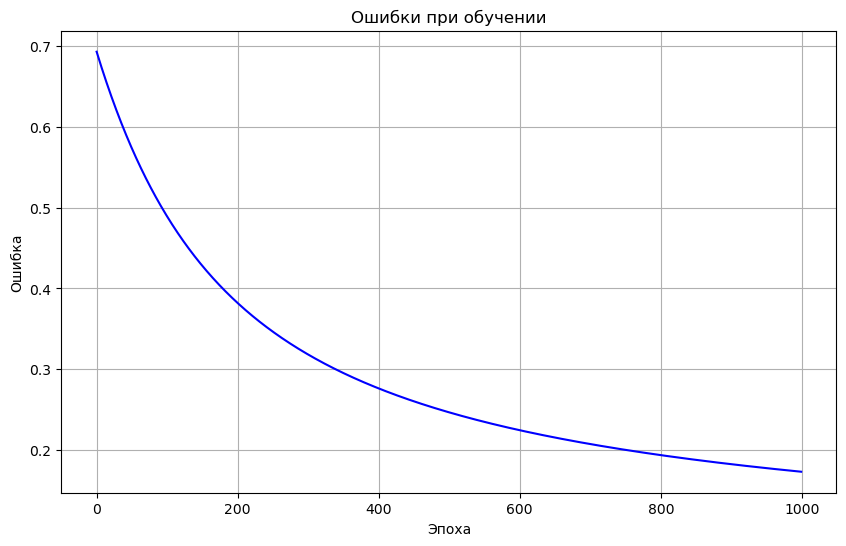

Precision: 0.9395, Recall: 1.0000, F1 Score: 0.9688
Accuracy: 0.9675


In [482]:
# Обучение
model = MyLogisticRegression()
model.fit(X_train, y_train)

# Визуализация ошибок обучения
plt.figure(figsize=(10, 6))
plt.plot(range(len(model.errors)), model.errors, color='blue')
plt.title('Ошибки при обучении')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка')
plt.grid()
plt.show()

# Предсказание и метрики
y_pred = model.predict(X_test)

precision, recall, f1_score = model.evaluate_metrics(y_test, y_pred)
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1_score:.4f}")

print("Accuracy:", model.accuracy(y_test, y_pred))

### Проверка sklearn

In [485]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

log_reg_model = LogisticRegression(random_state=0)
log_reg_model.fit(X_train, y_train)

print(f"Сдвиг (b0): {log_reg_model.intercept_}")
print(f"Коэффициенты (b1): {log_reg_model.coef_}")

# Предсказание
y_pred = log_reg_model.predict(X_test)

print("\nОтчёт о классификации")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
confusion_matrix(y_test, y_pred)
print(cm)

accuracy = log_reg_model.score(X_test, y_test)
print(f"\Точность: {accuracy:.3f}")

Сдвиг (b0): [-1.88919825]
Коэффициенты (b1): [[ 5.54498608e-02  2.01887940e-01  7.14990255e-02  4.02006677e-03
   4.98230151e+00 -1.89556650e-02  1.28507680e-01 -1.21053119e-01
  -1.49870150e-02  1.29995875e-01  3.33691627e-03  2.40674736e-01
   6.56046019e-02  1.75570070e+00  3.75918761e-02 -2.37152757e-02
   2.36275830e-01  3.63893883e-02  1.43449977e-01  9.23786797e-01]]

Отчёт о классификации
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       198
           1       0.96      0.98      0.97       202

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400

Confusion Matrix:
[[0 0]
 [0 0]]
\Точность: 0.968
